# `scikit-learn-whiskers`
https://github.com/ayaranitram/scikit-learn-whiskers

# import

In [1]:
from sklearn_whiskers import WhiskerOutliers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading synthetic data

In [3]:
data = pd.read_csv('./test/data/synthetic_data.csv')

## exploring the demo data
The data used in this demo has been generated randomly following a gaussian distribution and then a few outlier values has been manually added.

In [4]:
data.describe()

,A,B
count,30.000000,30.000000
mean,0.169563,25.700000
std,3.392163,19.145811
min,-8.178300,-25.000000
25%,-0.793515,18.500000
50%,-0.332636,25.000000
75%,0.561415,29.000000
max,9.579174,99.000000


In [5]:
data

,A,B
0,-5.751340,18
1,0.183419,34
2,-1.739405,23
3,-0.407147,12
4,-0.813476,29
5,0.601784,25
6,0.130457,21
7,0.315318,3
8,0.716157,29
9,-0.703382,24


## Visualizing the data
The boxplots below illustrate the oultier values that is intended to be eliminated from the data:

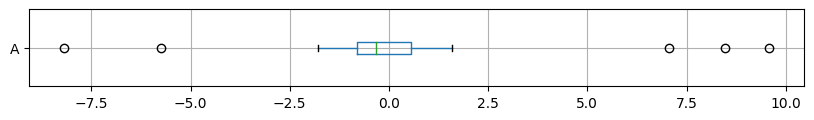

In [6]:
data.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

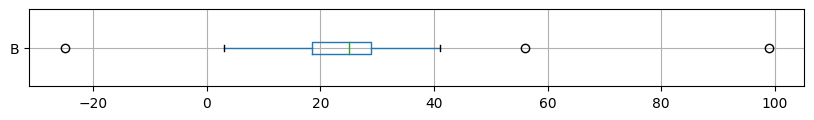

In [7]:
data.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

# WhiskerOutliers instance
## Parameters:
Only two parameters for these instances:
### threshold
- `float` or `int`
- default=`3.0`
- indicate the lenght of the whisker, values below or above the whisker will be considered outliers.
### add_indicator
- `bool`
- default=`False`
- if set to `True` new column(s) will be append indicating:
    - **-1** for outliers < the minimum whisker, 
    - **1** for outliers > the maximum whisker,
    - **0** for not outliers

## Attribuites
- **threshold**: the threshold, in terms of _inter-quantile range_, used to identifity the outliers.
- **indicator**: `True` or `False` as requested by the used to return or not new column(s) indicating the outlier values.
- **min_**: The minimum value that is not considered outlier.
- **max_**: The maximum value that is not considered outlier.

In [8]:
wo = WhiskerOutliers()

## Methods
### fit(X, [y])
Fit the instance on `X`
- `X`: pandas Series, DataFrame or array-like (like numpy array).
- `y`: ignored, accepted for convention and compatibility.
  
To calculate and retain in the instance the minimum and maximum values, according the _iqr_ and input `threshold`, that identify the outliers.  

How are the _iqr_, _minimum_ and _maximum_ calculated?
- The _iqr_ is calculated as the absolute difference between the 3rd quartile and the 1st quartile of the input data `X`.
- The _minimum_ is the 1st quartile (quantile 0.25) minus `threshold` times the _iqr_
- The _maximum_ is the 3rd quartile (quantile 0.75) plus `threshold` times the _iqr_

In [9]:
wo.fit(data)

WhiskerOutliers()

### transform(X, [y])
Transform the dataset `X`, replacing by `nunpy.nan` the outlier values, according to the limits defined by the `.fit` method.

In [10]:
transformed = wo.transform(data)

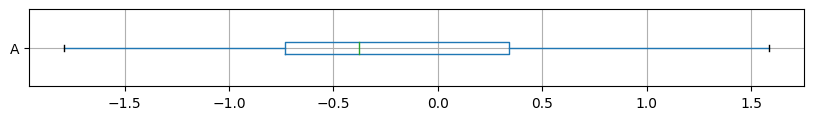

In [11]:
transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

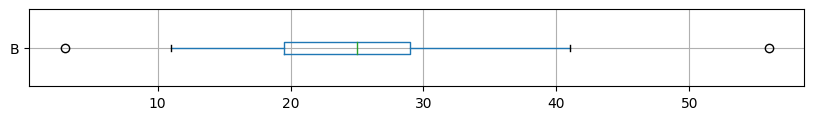

In [12]:
transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

## `fit` and `transform` with non-default parameters
In this example the `threshold`and `add_indicator` parameters has been changed from their default values:

In [13]:
wo = WhiskerOutliers(threshold=1.5, add_indicator=True)

In [14]:
wo.fit(data)

WhiskerOutliers(add_indicator=True, threshold=1.5)

In [15]:
transformed = wo.transform(data)

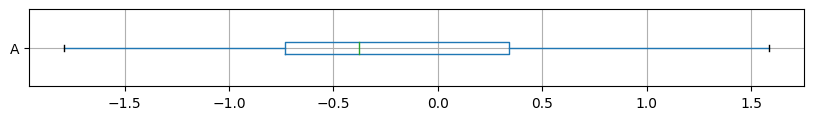

In [16]:
transformed.boxplot('A', figsize=(10, 1), vert=False)
plt.show()

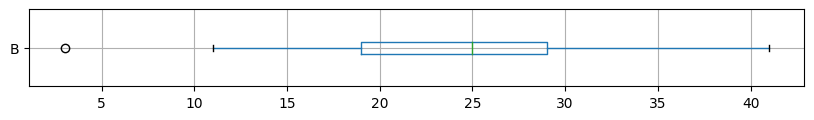

In [17]:
transformed.boxplot('B', figsize=(10, 1), vert=False)
plt.show()

With the paramenter **`add_indicator`=True** new column(s) with the suffix *_outlier* is(are) appended to the transformed dataset:

In [18]:
transformed

,A,B,A_outlier,B_outlier
0,NaN,18.0,-1,0
1,0.183419,34.0,0,0
2,-1.739405,23.0,0,0
3,-0.407147,12.0,0,0
4,-0.813476,29.0,0,0
5,0.601784,25.0,0,0
6,0.130457,21.0,0,0
7,0.315318,3.0,0,0
8,0.716157,29.0,0,0
9,-0.703382,24.0,0,0


These new indicator columns can be used to retain information about the removed values on machine learning pipelines or to identify the outlier values for plotting or other analysis:

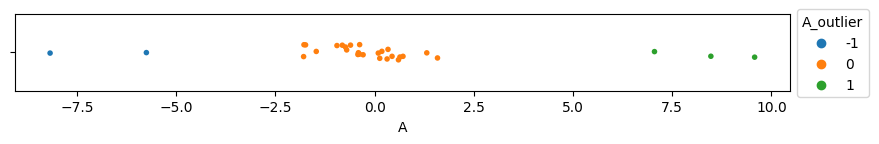

In [19]:
plt.figure(figsize=(10, 1))
ax = sns.stripplot(data, x="A", size=4, hue=transformed.A_outlier, palette=sns.color_palette(n_colors=3))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.15))
plt.show()

# Testing and demostrations
The previous examples were run using a pandas.DataFrame as input data, the following lines are intented to test the functionalities using padas.Series and numpy.array:
  
## using pandas.Series as input
### with `add_indicator=False` as per default

In [20]:
column_A = data['A']

In [21]:
WhiskerOutliers().fit_transform(column_A)

0          NaN
1     0.183419
2    -1.739405
3    -0.407147
4    -0.813476
5     0.601784
6     0.130457
7     0.315318
8     0.716157
9    -0.703382
10   -0.376354
11    0.638981
12   -1.469733
13   -1.788557
14    0.093530
15   -0.947836
16   -0.379213
17   -0.420326
18    0.440307
19   -0.288918
20   -0.606306
21    1.315781
22   -1.779490
23   -0.733635
24    0.338525
25    1.585907
26         NaN
27         NaN
28         NaN
29         NaN
Name: A, dtype: float64

### with `add_indicator=True`

In [22]:
WhiskerOutliers(add_indicator=True).fit_transform(column_A)

,A,A_outlier
0,NaN,-1
1,0.183419,0
2,-1.739405,0
3,-0.407147,0
4,-0.813476,0
5,0.601784,0
6,0.130457,0
7,0.315318,0
8,0.716157,0
9,-0.703382,0


## using numpy.array as input
- an array matrix of shape (30, 2), the 2 columns of the data
- a flatten vector array of shape (30,)

In [23]:
array_matrix = data.values
print('shape of array_matrix', array_matrix.shape)
array_A = data['A'].values.flatten()
print('shape of flatten array', array_A.shape)

shape of array_matrix (30, 2)
shape of flatten array (30,)


### using default parameters
- with *array_matrix*

In [24]:
WhiskerOutliers().fit_transform(array_matrix)

array([[        nan, 18.        ],
       [ 0.18341866, 34.        ],
       [-1.73940501, 23.        ],
       [-0.40714737, 12.        ],
       [-0.81347565, 29.        ],
       [ 0.6017841 , 25.        ],
       [ 0.13045701, 21.        ],
       [ 0.31531835,  3.        ],
       [ 0.71615739, 29.        ],
       [-0.70338173, 24.        ],
       [-0.37635435, 32.        ],
       [ 0.63898084, 41.        ],
       [-1.46973312, 17.        ],
       [-1.78855726, 23.        ],
       [ 0.09353018, 27.        ],
       [-0.9478361 , 30.        ],
       [-0.3792133 , 56.        ],
       [-0.42032595, 25.        ],
       [ 0.4403073 , 14.        ],
       [-0.28891821, 31.        ],
       [-0.60630559, 20.        ],
       [ 1.31578068, 27.        ],
       [-1.77949007, 29.        ],
       [-0.73363492, 11.        ],
       [ 0.33852455, 25.        ],
       [ 1.58590748, 27.        ],
       [        nan, 27.        ],
       [        nan, 17.        ],
       [        nan,

- with flatten vector array

In [25]:
WhiskerOutliers().fit_transform(array_A)

array([        nan,  0.18341866, -1.73940501, -0.40714737, -0.81347565,
        0.6017841 ,  0.13045701,  0.31531835,  0.71615739, -0.70338173,
       -0.37635435,  0.63898084, -1.46973312, -1.78855726,  0.09353018,
       -0.9478361 , -0.3792133 , -0.42032595,  0.4403073 , -0.28891821,
       -0.60630559,  1.31578068, -1.77949007, -0.73363492,  0.33852455,
        1.58590748,         nan,         nan,         nan,         nan])

### requesting to add indicator
- with *array_matrix*

In [26]:
WhiskerOutliers(add_indicator=True).fit_transform(array_matrix)

array([[        nan, 18.        , -1.        ,  0.        ],
       [ 0.18341866, 34.        ,  0.        ,  0.        ],
       [-1.73940501, 23.        ,  0.        ,  0.        ],
       [-0.40714737, 12.        ,  0.        ,  0.        ],
       [-0.81347565, 29.        ,  0.        ,  0.        ],
       [ 0.6017841 , 25.        ,  0.        ,  0.        ],
       [ 0.13045701, 21.        ,  0.        ,  0.        ],
       [ 0.31531835,  3.        ,  0.        ,  0.        ],
       [ 0.71615739, 29.        ,  0.        ,  0.        ],
       [-0.70338173, 24.        ,  0.        ,  0.        ],
       [-0.37635435, 32.        ,  0.        ,  0.        ],
       [ 0.63898084, 41.        ,  0.        ,  0.        ],
       [-1.46973312, 17.        ,  0.        ,  0.        ],
       [-1.78855726, 23.        ,  0.        ,  0.        ],
       [ 0.09353018, 27.        ,  0.        ,  0.        ],
       [-0.9478361 , 30.        ,  0.        ,  0.        ],
       [-0.3792133 , 56.

- with flatten vector array

In [27]:
WhiskerOutliers(add_indicator=True).fit_transform(array_A)

array([[        nan, -1.        ],
       [ 0.18341866,  0.        ],
       [-1.73940501,  0.        ],
       [-0.40714737,  0.        ],
       [-0.81347565,  0.        ],
       [ 0.6017841 ,  0.        ],
       [ 0.13045701,  0.        ],
       [ 0.31531835,  0.        ],
       [ 0.71615739,  0.        ],
       [-0.70338173,  0.        ],
       [-0.37635435,  0.        ],
       [ 0.63898084,  0.        ],
       [-1.46973312,  0.        ],
       [-1.78855726,  0.        ],
       [ 0.09353018,  0.        ],
       [-0.9478361 ,  0.        ],
       [-0.3792133 ,  0.        ],
       [-0.42032595,  0.        ],
       [ 0.4403073 ,  0.        ],
       [-0.28891821,  0.        ],
       [-0.60630559,  0.        ],
       [ 1.31578068,  0.        ],
       [-1.77949007,  0.        ],
       [-0.73363492,  0.        ],
       [ 0.33852455,  0.        ],
       [ 1.58590748,  0.        ],
       [        nan,  1.        ],
       [        nan,  1.        ],
       [        nan,